In [1]:
import pandas as pd, numpy as np
import os

import sklearn
assert sklearn.__version__ >= "0.20"

In [2]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Where to save the figures
PROJECT_ROOT_DIR=os.getcwd()
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
PROJECT_ROOT_DIR

'/Users/kuldip/OneDrive/IIITB ML&AI/Ml again'

In [4]:
# here it is importtant to mention as_frame = false otherwise it will read it as datafram and not n dimentional array.
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [5]:
# help(fetch_openml)

In [6]:
X,y=mnist['data'],mnist['target']

In [7]:
X.shape, y.shape

((70000, 784), (70000,))

In [8]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [9]:
y = y.astype(np.uint8)

5


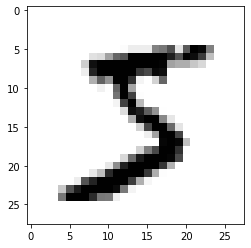

In [10]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Checking a sample.
print(y[0])
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
# plt.axis("off")
plt.show()

In [11]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
#     plt.axis("off")

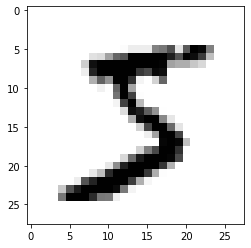

In [12]:
plot_digit(some_digit)

In [13]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

In [14]:
plt.figure(figsize=(9,9))
example_images = X[:100]
# plot_digits(example_images, images_per_row=10)
plt.show()

<Figure size 648x648 with 0 Axes>

In [15]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [16]:
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [17]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

### SGD Classifier
- SGDClassifier works on the principal of threshholds if the value is >threshhold it gets classified accordingly.
- Full description below
-- SGDClassifier(loss='hinge', *, penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)


In [18]:
# import sklearn
# help(SGDClassifier)
# 1e-3

In [19]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [20]:
sgd_clf.predict([some_digit])

array([ True])

# Performance measurement
- In case of unbalanced classes accuracy is hardly a good measure.
- We look at confusion matrics where **rows** are actual metric and **columns** are predictions
- **First** row is negative calls and **second** is positive class
- **precisionscore = TP/TP+FP** ....(Prediction power - theif getting free is still fine)
- **recall = TP/TP+FN**.....................(sensitivity - innocent charged with crime is not good at all) 
- **f1_scoe -** ....................................harmonic mean of precision and recall

In [21]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [22]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [23]:
precision_score(y_train_5, y_train_pred), \
recall_score(y_train_5, y_train_pred),\
f1_score(y_train_5, y_train_pred)

(0.8370879772350012, 0.6511713705958311, 0.7325171197343846)

In [24]:
y_score= sgd_clf.decision_function([some_digit])
y_score

array([2164.22030239])

In [25]:
y_score= cross_val_predict(sgd_clf, X_train,y_train_5, cv=3, method='decision_function')
y_score

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

### PR and ROC CURVE - which metric to be used ??
- Receiver operating charactorstic
- instead of precision/recall it plots True positive rate(recall) against False positive Rate(1-TNR/specificity)
- ROC and Precision_recall curve are simmilar - however prefer PR curve whenever postive class is rare or when you care more about the false positive then false negatives else ROC. (test should not show person with cancer as healthy...)

In [26]:
from sklearn.metrics import precision_recall_curve
precisions, recalls,thresholds= precision_recall_curve(y_train_5, y_score)

recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

Saving figure precision_recall_vs_threshold_plot


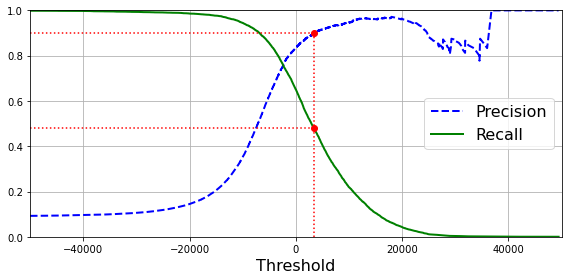

In [27]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    ax=[-50000, 50000, 0, 1]
    plt.axis(ax)             # Not shown


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()

#### THE PR CURVE

Saving figure precision_vs_recall


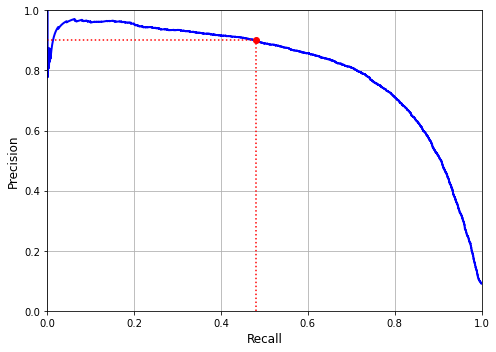

In [28]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, 'b-', linewidth=2)
    plt.xlabel('Recall', fontsize=12)
    plt.ylabel('Precision', fontsize=12)
    plt.axis([0,1,0,1])
    plt.grid(True)

plt.figure(figsize=(7,5))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision],[0,.9],'r:')
plt.plot([0, recall_90_precision],[.9,.9],'r:')
plt.plot([recall_90_precision],[.9],'ro:')
save_fig('precision_vs_recall')

#### THE ROC CURVE

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, theshholds = roc_curve(y_train_5, y_score)

Saving figure ROC_curve


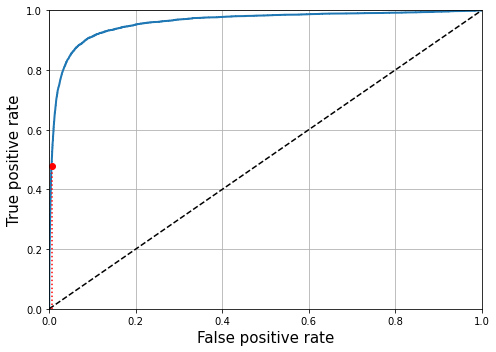

In [30]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr,tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False positive rate', fontsize=15)
    plt.ylabel('True positive rate', fontsize=15)
    plt.axis([0,1,0,1])
    plt.grid(True)
plt.figure(figsize=(7,5))
plot_roc_curve(fpr, tpr)
fpr_90= fpr[np.argmax(tpr>recall_90_precision)]
plt.plot([fpr_90,fpr_90],[0,recall_90_precision],'r:')
plt.plot([0,fpr_90],[recall_90_precision,recall_90_precision],'r:')
plt.plot([fpr_90],[recall_90_precision],'ro:')
save_fig('ROC_curve')

### SGD VS Random forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

forest_clf=RandomForestClassifier(random_state=42)
y_probas_forest=cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [32]:
# type(y_probas_forest)

In [33]:
y_score_forest =y_probas_forest[:,1]
fpr_forest, tpr_forest,threshold_forest=roc_curve(y_train_5, y_score_forest)

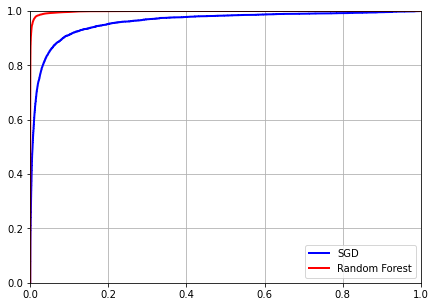

In [34]:
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr,'b',label='SGD', linewidth=2)
plt.plot(fpr_forest, tpr_forest,'r', label='Random Forest', linewidth=2)
plt.axis([0,1,0,1])
plt.legend(loc='lower right')
plt.grid(True)

In [35]:
roc_auc_score(y_train_5, y_score_forest),roc_auc_score(y_train_5, y_score)

(0.9983436731328145, 0.9604938554008616)

# Multiclass Classification
- Some classifiers are strictly binary like - SVM and linear classifier
- Random forest and bayes classifers are capable of handling multiple classifications

- when we use binary classififers for multiclass classification - under the hood sklearn  creates multiple models which distingushes the classes and makes final prediction basis overall score and take long time to run with not so great score
- When a classifier is trained, it stores the list of target classes in its classes_ attribute, ordered by value. In this case, the index of each class in the classes_ array conveniently matches the class itself (e.g., the class at index 5 happens to be class 5), but in general you won’t be so lucky.

In [55]:
# using the sgd for multiclass classification 
# which takes time and has less accuracy as can be seen with cross validation scores
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])  #--- wrongly predicted 5 as 3
# plot_digit(some_digit)
print(sgd_clf.predict(X[:10])) #--- wrongly predicted 5 as 3- otherwise not too bad.

# some_digit_score= sgd_clf.decision_function([other_digit])
# print(some_digit_score)

print(np.argmax(some_digit_score), sgd_clf.classes_[0])
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

[3 0 4 1 9 2 1 3 1 4]


NameError: name 'some_digit_score' is not defined

In [43]:
# training Random forest for multiclass classification which gives better results.

forest_clf.fit(X_train, y_train)

print(forest_clf.predict([some_digit]))
print(forest_clf.predict_proba([some_digit]))

cross_val_score(forest_clf, X_train, y_train, cv=3, scoring='accuracy')

[5]
[[0.   0.   0.01 0.08 0.   0.9  0.   0.   0.   0.01]]


array([0.9646 , 0.96255, 0.9666 ])

In [38]:
# improving the proformance of the sdf  by scaling 
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring ='accuracy')

array([0.8983, 0.891 , 0.9018])

In [44]:
y_train_pred = cross_val_predict(forest_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5840,    1,    8,    2,    4,    9,   20,    1,   35,    3],
       [   1, 6634,   43,   12,   13,    5,    6,   13,   12,    3],
       [  26,   12, 5749,   29,   32,    5,   20,   37,   42,    6],
       [   7,    7,   93, 5809,    3,   63,    7,   49,   61,   32],
       [  12,   13,   14,    1, 5643,    0,   29,   14,   17,   99],
       [  20,    9,    9,   65,   13, 5195,   53,    6,   32,   19],
       [  25,   11,    5,    0,   12,   45, 5805,    0,   15,    0],
       [   4,   24,   58,    6,   37,    1,    0, 6037,   11,   87],
       [   9,   35,   44,   53,   26,   52,   27,    5, 5524,   76],
       [  21,   10,   13,   76,   75,   15,    3,   58,   45, 5633]])

In [52]:
f1_score(y_train, y_train_pred,average='macro'), recall_score(y_train, y_train_pred, average='macro')


(0.9641924046044968, 0.9642122577841004)

In [53]:
# help(f1_score)

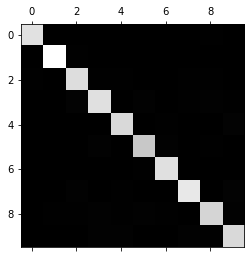

In [45]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

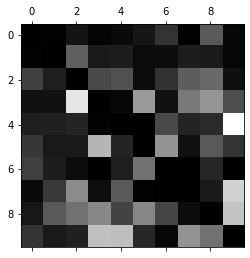

In [54]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx= conf_mx/row_sums
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)

## Multilabel Classification
- KNeighborsClassifier (which supports multilabel classification, but not all classifiers do)
- Evaliation - one approach is to measrure the F1 score of each individual label and then simply compute the average score. Average used can be changed basis importance you want to give to label

In [57]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large= (y_train >=7)
y_train_odd= (y_train%2==1)
y_multilabel=np.c_[y_train_large, y_train_odd]

In [61]:
# y_multilabel
knn_clf= KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [69]:
knn_clf.predict([some_digit])
y_train_pred= cross_val_predict(knn_clf, X_train, y_multilabel,cv=3)

In [73]:
f1_score(y_multilabel, y_train_pred, average='macro'),\
f1_score(y_multilabel, y_train_pred, average='weighted')
#  macro means all labels are equally important

(0.976410265560605, 0.9778357403921755)

## Multioutput Classification
- generalised case of multilabel classification where wach label can be multiclass(>1possible values)